## Решатель для 7 упражнения.

Советуем подключить гугл диск и закидывать папки на него. В Колаб данные грузятся ооочень долго. Подключить диск можно нажав на эту иконку 

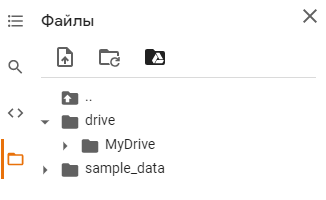

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from IPython.display import Image
from imutils import paths
import numpy as np
import cv2
import os

In [4]:
def extract_histogram(image, bins=(8, 8, 8)):
    hist = cv2.calcHist([image], [0, 1, 2], None, bins, [0, 256, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()

In [5]:
import glob

In [6]:
imagePaths = sorted(glob.glob('train/*'))
data = []
labels = []

for (i, imagePath) in enumerate(imagePaths):
    image = cv2.imread(imagePath, 1)
    label = imagePath.split(os.path.sep)[-1].split(".")[0]
    hist = extract_histogram(image)
    data.append(hist)
    labels.append(label)

0


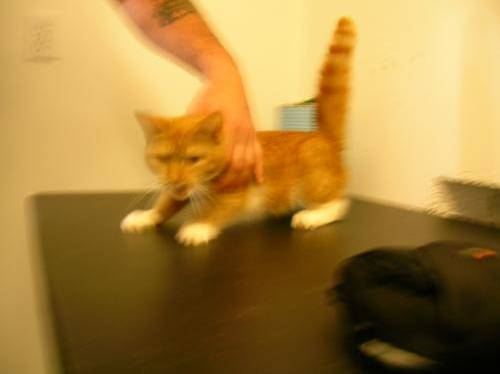

In [7]:
le = LabelEncoder()
labels = le.fit_transform(labels)
print(labels[0])
Image(filename=imagePaths[0])

In [17]:
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(data), labels, test_size=0.25, random_state=6) # random_state дано в упражнении

In [18]:
model = LinearSVC(random_state = 6, C = 1.39) # random_state и С дано в упражнении
model.fit(trainData, trainLabels)

LinearSVC(C=1.39, random_state=6)

In [19]:
predictions = model.predict(testData)

In [20]:
print(classification_report(testLabels, predictions, target_names=le.classes_))

              precision    recall  f1-score   support

         cat       0.58      0.66      0.62       126
         dog       0.60      0.52      0.55       124

    accuracy                           0.59       250
   macro avg       0.59      0.59      0.59       250
weighted avg       0.59      0.59      0.59       250



In [36]:
from sklearn.model_selection import cross_val_score

In [38]:
cross_val_score(model, testData, testLabels, scoring='accuracy', cv=2).mean()

0.536

In [21]:
from sklearn.metrics import f1_score
predictions = model.predict(testData)
f1_score(testLabels, predictions, average='macro') # среднее значение F1

0.5856064629298829

In [25]:
model.coef_[0][252] # не забываем ввести индексы коэффициентов, которые надо найти (они могут быть равны нулю)

0.003098476006689849

Вычислим предсказания для объекта из папки test

In [34]:
singleImage = cv2.imread('test/cat.1000.jpg') # вводим название фото, для которого нужно определить класс 
histt = extract_histogram(singleImage)
histt2 = histt.reshape(1, -1)
prediction = model.predict(histt2)

In [35]:
prediction # если класс ['cat'] - пишем в ответ 0, если ['dog'] - 1

array([1])